<a href="https://colab.research.google.com/github/I-jidd/Data-Analysis/blob/main/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rock Paper Scissors Model Training

In [ ]:
#Install required packages

!pip install tensorflow opencv-python matplotlib numpy kaggle

In [ ]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
#dataset of rock paper scissors
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")
print("Path to dataset files: ", path)

Path to dataset files:  /kaggle/input/rockpaperscissors


In [ ]:
#list of everythin int he downloaded path
print("Contents of the dataset folder:")
print(os.listdir(path))

Contents of the dataset folder:
['paper', 'rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors']


checking the shape of the image

In [ ]:
subset = 5
rock_folder = '/kaggle/input/rockpaperscissors/rock'
paper_folder = '/kaggle/input/rockpaperscissors/paper'
scissors_folder = '/kaggle/input/rockpaperscissors/scissors'

rock_images = [rock for rock in os.listdir(rock_folder) if rock.endswith(('jpg', 'jpeg', 'png'))]

for i, filename in enumerate(rock_images[:subset]):
  file_path = os.path.join(rock_folder, filename)
  img = cv2.imread(file_path)
  if img is not None:
    print(f"Rock Img {i+1}: {filename}, Shape: {img.shape} (height, width, channels)")

paper_images = [paper for paper in os.listdir(paper_folder) if paper.endswith(('jpg', 'jpeg', 'png'))]

for i, filename in enumerate(paper_images[:subset]):
  file_path = os.path.join(paper_folder, filename)
  img = cv2.imread(file_path)
  if img is not None:
    print(f"Paper Img {i+1}: {filename}, Shape: {img.shape} (height, width, channels)")

scissor_images = [scissor for scissor in os.listdir(scissors_folder) if scissor.endswith(('jpg', 'jpeg', 'png'))]

for i, filename in enumerate(scissor_images[:subset]):
  file_path = os.path.join(scissors_folder, filename)
  img = cv2.imread(file_path)
  if img is not None:
    print(f"Scissor Img {i+1}: {filename}, Shape: {img.shape} (height, width, channels)")

Rock Img 1: qUjyvBdP04lUmBkl.png, Shape: (200, 300, 3) (height, width, channels)
Rock Img 2: 7YpH9C6XA1GIbSum.png, Shape: (200, 300, 3) (height, width, channels)
Rock Img 3: ON7ALRXFwvKHbBPL.png, Shape: (200, 300, 3) (height, width, channels)
Rock Img 4: 2UaJz6Z3xJv3WX9h.png, Shape: (200, 300, 3) (height, width, channels)
Rock Img 5: HWvrWXLQywNe1aCF.png, Shape: (200, 300, 3) (height, width, channels)
Paper Img 1: cQ0dBO3yHPohZ9U9.png, Shape: (200, 300, 3) (height, width, channels)
Paper Img 2: jAh36hlZLpECSBHp.png, Shape: (200, 300, 3) (height, width, channels)
Paper Img 3: QnjBVl6cFnyd2hVF.png, Shape: (200, 300, 3) (height, width, channels)
Paper Img 4: dZh2VMRu9nRGHhYL.png, Shape: (200, 300, 3) (height, width, channels)
Paper Img 5: SDQQfzHl47yNqA6K.png, Shape: (200, 300, 3) (height, width, channels)
Scissor Img 1: TfQG2fJYyDv8Ic8P.png, Shape: (200, 300, 3) (height, width, channels)
Scissor Img 2: EesxTpYzhZoMVlH8.png, Shape: (200, 300, 3) (height, width, channels)
Scissor Img 3: 8G

Organize dataset into train, validation, test folders

In [ ]:
organized_dataset = '/kaggle/working/organized_dataset'

#define the split ratio
train_ratio = 0.7
val_ratio = 0.2
test_ratio = .1

# Function to split and organize dataset
def organize_data(src_folder, dest_folder, label):
    # Get all files in the source folder
    files = os.listdir(src_folder)

    # Split data
    train_files, test_files = train_test_split(files, test_size=(val_ratio + test_ratio), random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

    # Define paths
    for split, file_list in zip(['train', 'validation', 'test'], [train_files, val_files, test_files]):
        split_path = os.path.join(dest_folder, split, label)
        os.makedirs(split_path, exist_ok=True)

        # Move files
        for file in file_list:
            src = os.path.join(src_folder, file)
            dest = os.path.join(split_path, file)
            shutil.copy(src, dest)

# Organize each category
organize_data(rock_folder, organized_dataset, 'rock')
organize_data(paper_folder, organized_dataset, 'paper')
organize_data(scissors_folder, organized_dataset, 'scissors')


print the number of images in each folder

In [ ]:
for split in ['train', 'validation', 'test']:
  for label in ['rock', 'paper', 'scissors']:
    folder = os.path.join(organized_dataset, split, label)
    print(f"{split}/{label}: {len(os.listdir(folder))} images")

train/rock: 508 images
train/paper: 498 images
train/scissors: 524 images
validation/rock: 145 images
validation/paper: 142 images
validation/scissors: 150 images
test/rock: 73 images
test/paper: 72 images
test/scissors: 76 images


Since the image shape is 200x200, we will resize it according the the pretrained model

In [ ]:
#Resize Image
import cv2
from pathlib import Path

def resize_image(folder, target_size = (244,224)):
  for image_path in Path(folder).rglob("*.png"):
    img = cv2.imread(str(image_path))
    if img is not None:
      img_resize = cv2.resize(img, target_size)
      cv2.imwrite(str(image_path), img_resize)

#Resizes images in all splits
base_path = '/kaggle/working/organized_dataset'
for split in ['train', 'validation', 'test']:
  for label in ['rock', 'paper', 'scissor']:
    resize_image(os.path.join(base_path,split,label))

In [ ]:
def check_image_shapes(folder):
    for split in ['train', 'validation', 'test']:
        for label in ['rock', 'paper', 'scissors']:
            folder_path = os.path.join(folder, split, label)
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    print(f"{file_path}: {img.shape}")
check_image_shapes(base_path)
#this will show (224, 224, 3)
#ps. I cleared the output since taas kaayo ang output hehe

/kaggle/working/organized_dataset/train/rock/HxzCqTAGvmLYaHjA.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/AfK6szcUXW6HDlxI.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/W7LNJeGLwxY8gzGf.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/oJgp2GfiHRHchjDv.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/WuAzBDRg8CTEJS9v.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/8pAWVg9BVmtha8LM.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/MgF3uIzpCPWudb3N.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/DJUhF4lvtGZoaatl.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/94oKRQFyit6SANlq.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/BFVK8zqyFZ9SFqm4.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/hNKauGm372Z48JWy.png: (224, 244, 3)
/kaggle/working/organized_dataset/train/rock/qGG51BxEClmts5xA.png: (224, 244, 3)
/kaggle/working/organized_da

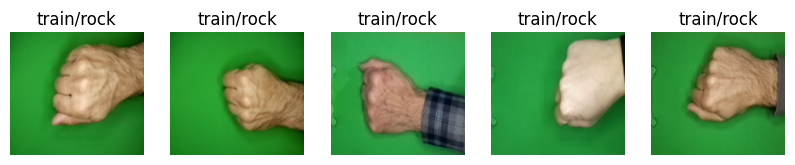

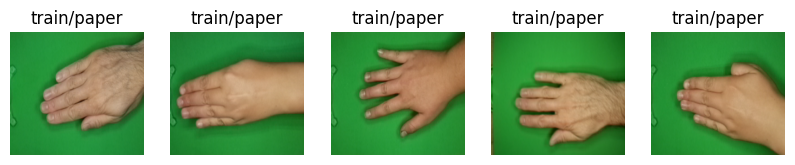

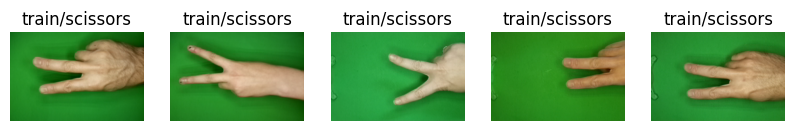

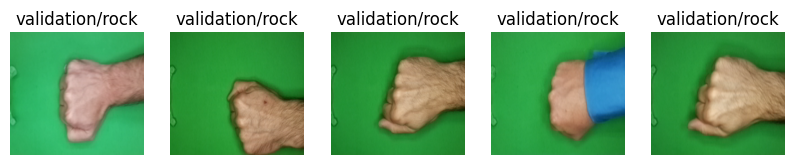

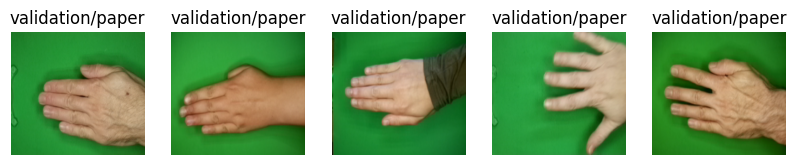

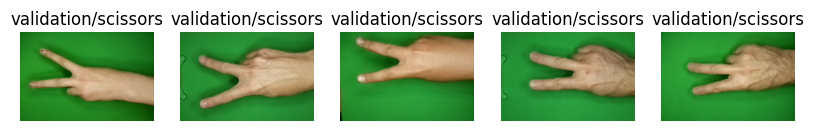

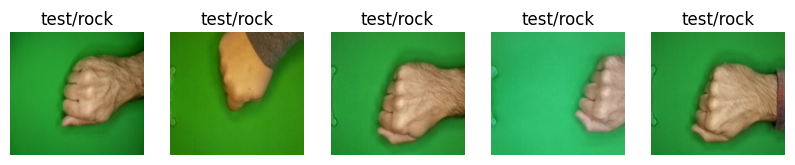

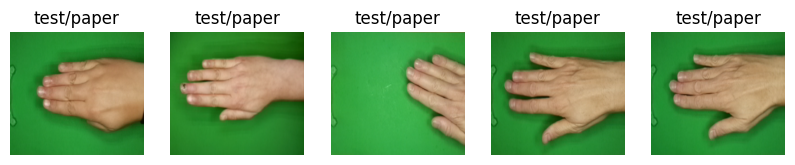

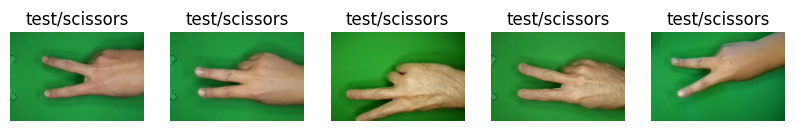

In [ ]:
# Define a function to display images
def display_images(folder, num_images=5):
    for split in ['train', 'validation', 'test']:
        for label in ['rock', 'paper', 'scissors']:
            folder_path = os.path.join(folder, split, label)
            images = os.listdir(folder_path)[:num_images]

            plt.figure(figsize=(10, 5))
            for i, image_name in enumerate(images):
                img_path = os.path.join(folder_path, image_name)
                img = cv2.imread(img_path)[:, :, ::-1]  # Convert BGR to RGB
                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.title(f"{split}/{label}")
                plt.axis('off')
            plt.show()

# Display resized images
display_images(base_path)

Now, we'll load and modify the pretrained model - ResNet50

In [ ]:
#import the model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
# Load ResNet50 without the top layer
base_model = ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#compile the model with appropriate optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Define Data Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=30,    # Random rotation
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,      # Shearing
    zoom_range=0.2,       # Random zoom
    horizontal_flip=True, # Random horizontal flip
    fill_mode='nearest'   # Fill in gaps
)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only normalization for validation/test sets

# Define directories
train_dir = '/kaggle/working/organized_dataset/train'
validation_dir = '/kaggle/working/organized_dataset/validation'

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resized to match ResNet50 input
    batch_size=32,
    class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1530 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#define callbacks
early_stopping =EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

model_checkpoint = ModelCheckpoint(
    filepath = 'best_model.keras',
    monitor= 'val_loss',
    save_best_only = True
)

Train the model

In [ ]:
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 394s 8s/step - accuracy: 0.3831 - loss: 1.1092 - val_accuracy: 0.3341 - val_loss: 1.1046
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 442s 8s/step - accuracy: 0.3403 - loss: 1.1056 - val_accuracy: 0.3432 - val_loss: 1.0958
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 385s 8s/step - accuracy: 0.3463 - loss: 1.0990 - val_accuracy: 0.3432 - val_loss: 1.0958
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 436s 8s/step - accuracy: 0.3621 - loss: 1.0975 - val_accuracy: 0.3432 - val_loss: 1.0951
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.3662 - loss: 1.0976 - val_accuracy: 0.3455 - val_loss: 1.0954
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 442s 8s/step - accuracy: 0.3767 - loss: 1.0942 - val_accuracy: 0.3318 - val_loss: 1.0966
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 439s 8s/step - accuracy: 0.3332 - loss: 1.1004 - val_accuracy: 0.3799 - val_loss: 1.0943
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 433s 8s/step - accuracy: 0.3345 - loss: 1.0964 - val_accuracy: 0.3249 - v

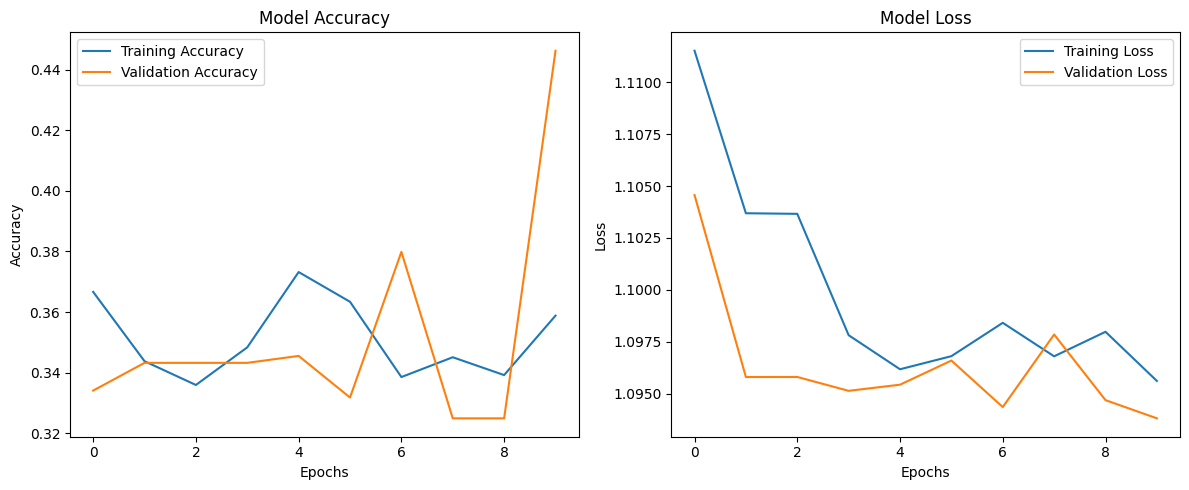

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Fine-Tune the model

In [ ]:
# Unfreeze some layers for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1378s 28s/step - accuracy: 0.3966 - loss: 1.7290 - val_accuracy: 0.3389 - val_loss: 1.1044
Epoch 2/10
 1/47 ━━━━━━━━━━━━━━━━━━━━ 20:31 27s/step - accuracy: 0.8438 - loss: 0.5246

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8438 - loss: 0.5246 - val_accuracy: 0.3413 - val_loss: 1.1053
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1341s 29s/step - accuracy: 0.8792 - loss: 0.4325 - val_accuracy: 0.3317 - val_loss: 1.2548
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 1.0000 - loss: 0.1819 - val_accuracy: 0.3365 - val_loss: 1.2614
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1335s 28s/step - accuracy: 0.9637 - loss: 0.1729 - val_accuracy: 0.3245 - val_loss: 1.4918
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 1.0000 - loss: 0.0567 - val_accuracy: 0.3221 - val_loss: 1.4887


In [ ]:
# Define the test directory
test_dir = '/kaggle/working/organized_dataset/test'

# Create the test generator
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Match the model's input size
    batch_size=32,          # Batch size
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Do not shuffle for evaluation
)


Found 221 images belonging to 3 classes.


Evaluate and save the model

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.2731 - loss: 1.0729
Test Accuracy: 33.03%


Save the model

In [ ]:
model.save('resnet50_rock_paper_scissors.keras')

In [ ]:
!git clone https://github.com/I-jidd/Data-Analysis.git

Cloning into 'Data-Analysis'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 43 (delta 7), reused 30 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 212.63 KiB | 4.83 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
!mv resnet50_rock_paper_scissors.keras Data-Analysis/

In [ ]:
!ls
!cd Data-Analysis/
!ls

best_model.h5	  Data-Analysis			sample_data
best_model.keras  rock_paper_scissors_model.h5
best_model.h5	  Data-Analysis			sample_data
best_model.keras  rock_paper_scissors_model.h5


In [ ]:
!cd Data-Analysis/
!git config --global user.name "Jade Lecias"
!git config --global user.email "jade.notsopersonal@gmail.com"

!git add resnet50_rock_paper_scissors.keras
!git commit -m "Added trained model for rock-paper-scissors project"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
from google.colab import drive
drive.mount('/content/drive')